<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [15]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [16]:
df.shape

(11398, 85)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irrespon

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [63]:
print(df['ConvertedComp'].describe())
print(df['ConvertedComp'].min())
print(df['ConvertedComp'].max())

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64
0.0
2000000.0


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp'>

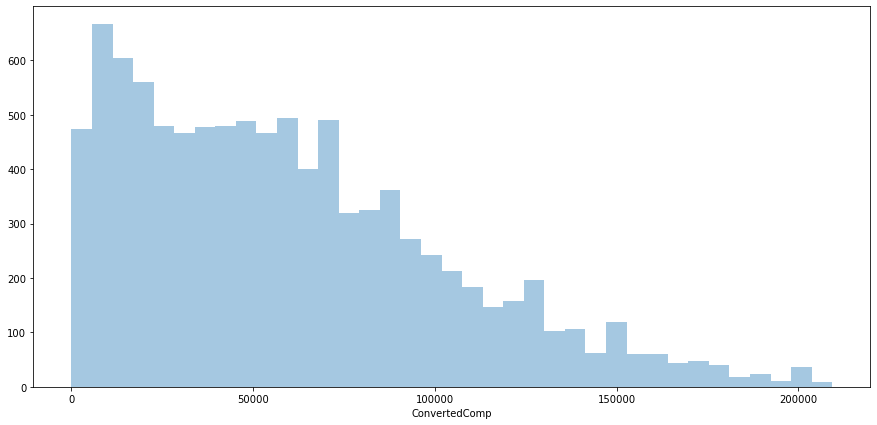

In [280]:
plt.figure(figsize=(15, 7))
sns.distplot(df['ConvertedComp'], kde=False)

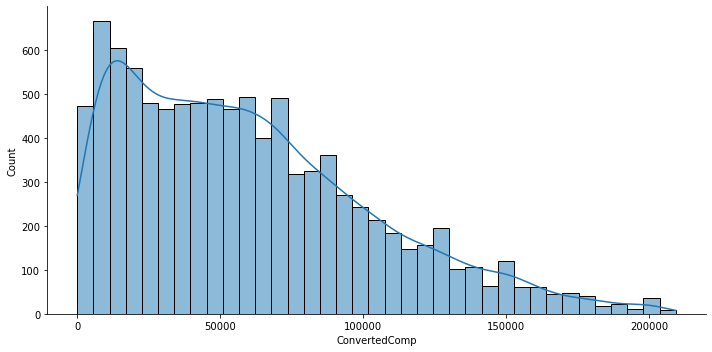

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(data=df, x='ConvertedComp', kde=True, aspect=2, height=5)

Plot the histogram for the column `ConvertedComp`.


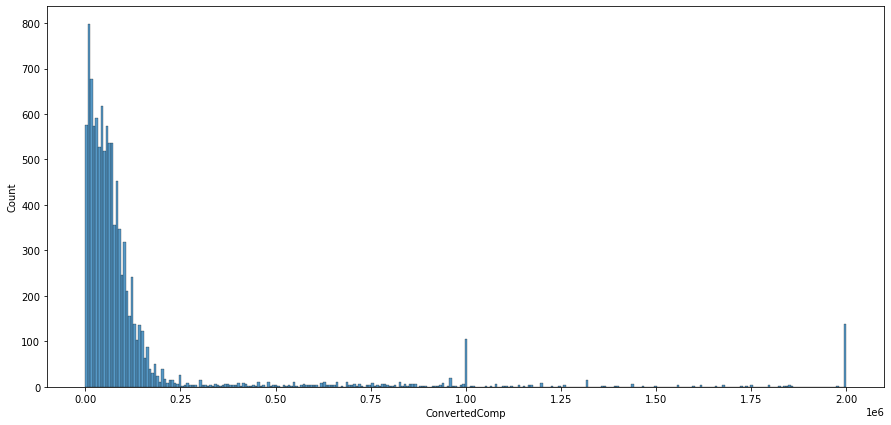

In [67]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='ConvertedComp')
# le6 means 10*6. So 2le6 means 2*10*6=2,000,000

What is the median of the column `ConvertedComp`?


In [83]:
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [88]:
df['Gender'].value_counts()
# The answer is 10480

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [91]:
df_woman = df[df['Gender']=='Woman']
print(df_woman.shape)
print(df_woman['ConvertedComp'].median())

(731, 85)
57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


<AxesSubplot:ylabel='Age'>

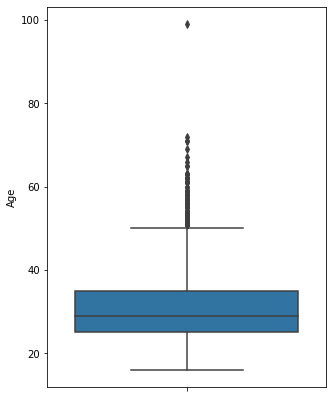

In [97]:
plt.figure(figsize=(5, 7))
sns.boxplot(data=df, y='Age')

In [92]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [111]:
print('Five numbers of Age:\n'
      '1. maximum: 99 years old\n'
      '2. Q3:      35 years old\n' 
      '3. median:  29 years old\n'
      '4. Q1:      25 years old\n'
      '5. minimum: 16 years old')

Five numbers of Age:
1. maximum: 99 years old
2. Q3:      35 years old
3. median:  29 years old
4. Q1:      25 years old
5. minimum: 16 years old


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

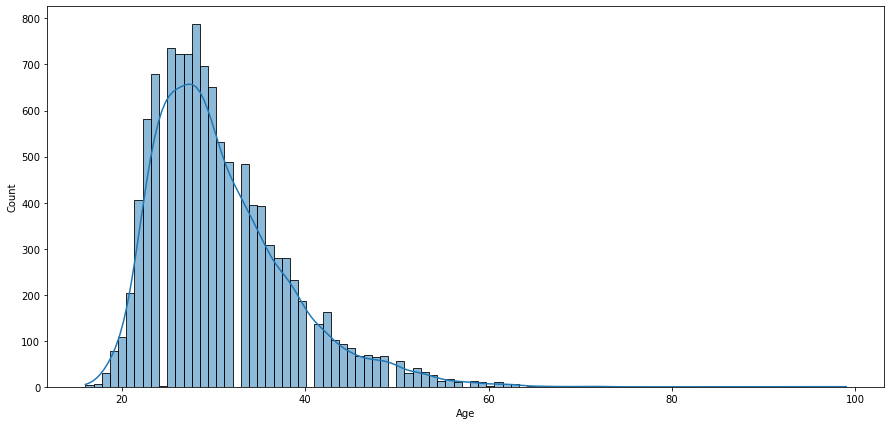

In [115]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='Age', kde=True)

### The below cells are for the Quizs

<AxesSubplot:xlabel='Age', ylabel='Count'>

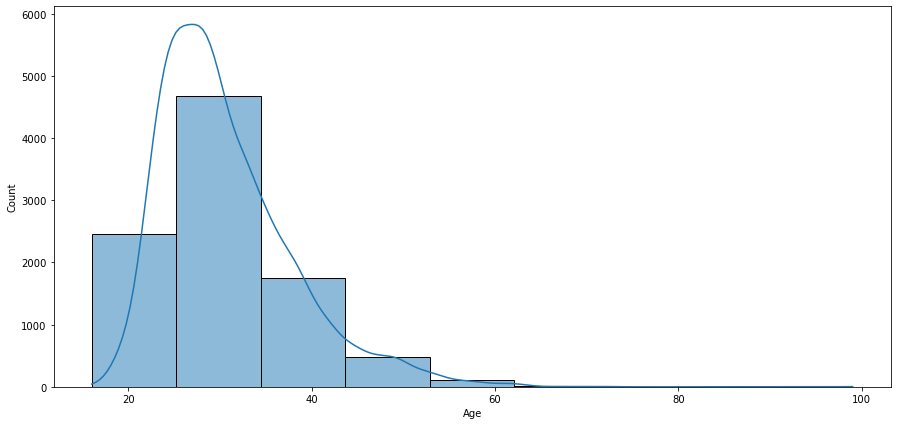

In [211]:
import numpy as np
# numpy.linspace(start_value, end_value, number_of_divider)
bins = np.linspace(16, 99, 10, endpoint=True)

plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='Age', kde=True, bins= bins)



<BarContainer object of 10 artists>

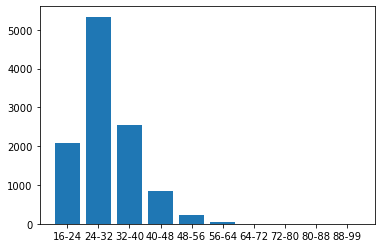

In [7]:
import matplotlib.pyplot as plt
bins = np.linspace(df['Age'].min(), df['Age'].max(), 11)
bins_names = ['16-24', '24-32', '32-40', '40-48', '48-56', '56-64', '64-72', '72-80', '80-88', '88-99']
df['Age_10bins'] = pd.cut(df['Age'], bins=bins, labels=bins_names, include_lowest=True, ordered=True)
plt.bar(bins_names, df['Age_10bins'].value_counts().sort_index()) 
# use the .sort_index() method, otherwise the order of the result will be in descending of the .value_counts() method 

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64
Q1 =  26868.0 
Q3 =  100000.0 
IQR =  73132.0 
outlier_upper 209698.0 
outlier_lower -82830.0


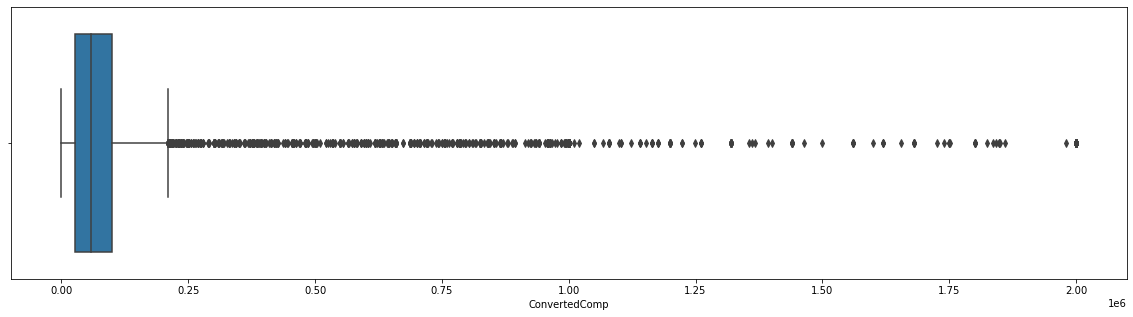

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot a boxplot
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='ConvertedComp')
print(df['ConvertedComp'].describe())

# Calculate IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
outlier_upper = Q3 + IQR*1.5
outlier_lower = Q1 - IQR*1.5

print('Q1 = ', Q1,
      '\nQ3 = ', Q3,
      '\nIQR = ', IQR,
      '\noutlier_upper', outlier_upper,
      '\noutlier_lower', outlier_lower)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [296]:
print(IQR)

73132.0


Find out the upper and lower bounds.


In [191]:
print('Upperbound = ', Q3,
      '\nLowerbound = ', Q1)

Upperbound =  100000.0 
Lowerbound =  26868.0


Identify how many outliers are there in the `ConvertedComp` column.


In [10]:
import numpy as np
outlier = (df['ConvertedComp'] < outlier_lower)|(df['ConvertedComp'] > outlier_upper)
print(df[outlier][['ConvertedComp']].info()) # df[outlier] only returns the values that are outliers, other values are displayed as NaN
print('The number of outlier is ', 879)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 3 to 11369
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  879 non-null    float64
dtypes: float64(1)
memory usage: 13.7 KB
None
The number of outlier is  879


In [302]:
outlier = (df['ConvertedComp'] < outlier_lower)|(df['ConvertedComp'] > outlier_upper)
df.loc[outlier, 'ConvertedComp'] # This only returns the values that are outliers, other values are displayed as NaN

3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
70        962424.0
71        960000.0
76       2000000.0
104       233000.0
111       649536.0
119       235525.0
120       864000.0
123      1000000.0
130       471048.0
131       618708.0
203      2000000.0
210      2000000.0
237      2000000.0
249       235525.0
264      1750000.0
306       412464.0
308       412464.0
321       275000.0
334       230000.0
347       230000.0
348       232000.0
351       706572.0
358      2000000.0
367       730128.0
369      1000000.0
370      2000000.0
374       360000.0
390       494964.0
405      1620000.0
408       942096.0
412       714948.0
427       209931.0
431       238000.0
432       467460.0
442       643764.0
457      1000000.0
467      1152000.0
468       318864.0
477       728700.0
481       230000.0
505      1000000.0
513       260000.0
541       210973.0
582      2000000.0
615      1368000.0
617      1000000.0
631       646200.0
647       67

In [19]:
# Use the .copy() function to create a copy of the original dataframe in case of making any irreversible changes
df_new = df.copy(deep=True)
# Use the dataframe.loc method to avoid the SettingWithCopyWarning warning: A value is trying to be set on a copy of a slice from a DataFrame.
df_new.loc[outlier, 'ConvertedComp'] = np.nan # This sets the value of the outliers to NaN
df_new.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df_new[['ConvertedComp']].head(10)

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
4,65277.0
5,31140.0
6,41244.0
7,103000.0
8,69000.0
9,26388.0
10,6300.0


In [18]:
df[['ConvertedComp']].head(10)

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
5,31140.0
6,41244.0
7,103000.0
8,69000.0
9,26388.0


In [29]:
df_test = df.copy(deep=True)
df_test.loc[outlier, 'ConvertedComp'] = np.nan
df_test['ConvertedComp'].head()

0    61000.0
1    95179.0
2    90000.0
3        NaN
4    65277.0
Name: ConvertedComp, dtype: float64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
df_test.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
print(df_test.shape)
df_test.reset_index(inplace=True, drop=False) 
# drop=True will prevent the function from adding the old index as a column to the dataframe 
df_test.head()

(9703, 85)


,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,A

### The below cells are for the Quizs

In [252]:
df_new['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [207]:
df_new.corr()
#df_new.corr()[['Age']]

,old index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
old index,1.000000,0.999986,-0.019334,0.010927,-0.016249,0.005346,0.002304
Respondent,0.999986,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019334,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010927,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016249,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005346,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002304,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
